### Medical Cost Prediction using ANN


In [64]:
# Importing the required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
# importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [66]:
df.tail(1)

,age,sex,bmi,children,smoker,region,charges
1337,61,female,29.07,0,yes,northwest,29141.3603


In [67]:
mv = df.isnull().sum()
mp = (mv/len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing value ' : mv, 'Missing Percentage ' : mp})
data

,Missing value,Missing Percentage
age,0,0.0
sex,0,0.0
bmi,0,0.0
children,0,0.0
smoker,0,0.0
region,0,0.0
charges,0,0.0


In [68]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

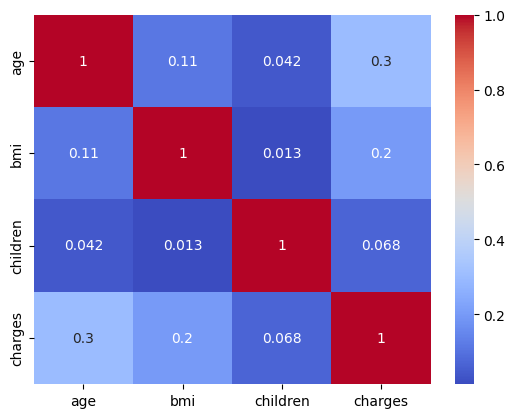

In [69]:
sns.heatmap(df.corr(numeric_only = True), annot = True, cmap = 'coolwarm')
plt.show()

In [70]:
# Converting the categorical data into numerical data using one hot encoding 
dfohe = pd.get_dummies(df)
dfohe = dfohe.astype(int)
dfohe

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,16884,1,0,0,1,0,0,0,1
1,18,33,1,1725,0,1,1,0,0,0,1,0
2,28,33,3,4449,0,1,1,0,0,0,1,0
3,33,22,0,21984,0,1,1,0,0,1,0,0
4,32,28,0,3866,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30,3,10600,0,1,1,0,0,1,0,0
1334,18,31,0,2205,1,0,1,0,1,0,0,0
1335,18,36,0,1629,1,0,1,0,0,0,1,0
1336,21,25,0,2007,1,0,1,0,0,0,0,1


In [71]:
dfohe.columns

Index(['age', 'bmi', 'children', 'charges', 'sex_female', 'sex_male',
       'smoker_no', 'smoker_yes', 'region_northeast', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')

In [72]:
# Create x and y values 
x = dfohe.drop('charges', axis = 1)
y = dfohe[['charges']]

In [73]:
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27,0,1,0,0,1,0,0,0,1
1,18,33,1,0,1,1,0,0,0,1,0
2,28,33,3,0,1,1,0,0,0,1,0
3,33,22,0,0,1,1,0,0,1,0,0
4,32,28,0,0,1,1,0,0,1,0,0


In [74]:
y.head()

,charges
0,16884
1,1725
2,4449
3,21984
4,3866


In [75]:
# Creating the training and testing sets 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)
len(x), len(x_train), len(x_test), len(y), len(y_train), len(y_test) 

(1338, 1070, 268, 1338, 1070, 268)

In [76]:
x_train.size, y_train.size

(11770, 1070)

In [81]:
# Build a neural network based on our requirements 

# 1.Create a model
tf.random.set_seed(42)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics = ['mae'])

# 3. Fit the model
history = model.fit(x_train, y_train, epochs=100, validation_split=0.2)
history

Epoch 1/100
27/27 [==============================] - 1s 15ms/step - loss: 9263.1504 - mae: 9263.1504 - val_loss: 7136.2490 - val_mae: 7136.2490
Epoch 2/100
27/27 [==============================] - 0s 7ms/step - loss: 7987.1255 - mae: 7987.1255 - val_loss: 6464.1924 - val_mae: 6464.1924
Epoch 3/100
27/27 [==============================] - 0s 7ms/step - loss: 7884.5127 - mae: 7884.5127 - val_loss: 7641.3843 - val_mae: 7641.3843
Epoch 4/100
27/27 [==============================] - 0s 8ms/step - loss: 7760.0527 - mae: 7760.0527 - val_loss: 6734.7803 - val_mae: 6734.7803
Epoch 5/100
27/27 [==============================] - 0s 7ms/step - loss: 7828.3096 - mae: 7828.3096 - val_loss: 6409.6519 - val_mae: 6409.6519
Epoch 6/100
27/27 [==============================] - 0s 8ms/step - loss: 7841.0425 - mae: 7841.0425 - val_loss: 6388.4111 - val_mae: 6388.4111
Epoch 7/100
27/27 [==============================] - 0s 7ms/step - loss: 7719.1997 - mae: 7719.1997 - val_loss: 6538.9341 - val_mae: 6538.934

In [82]:
y_pred = model.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [83]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(x_test, y_test)
print("Test MAE:", test_mae)

9/9 [==============================] - 0s 4ms/step - loss: 8078.7705 - mae: 8078.7705
Test MAE: 8078.7705078125


In [85]:
y_pred = y_pred.flatten()
y_test_flat = y_test.values.flatten()

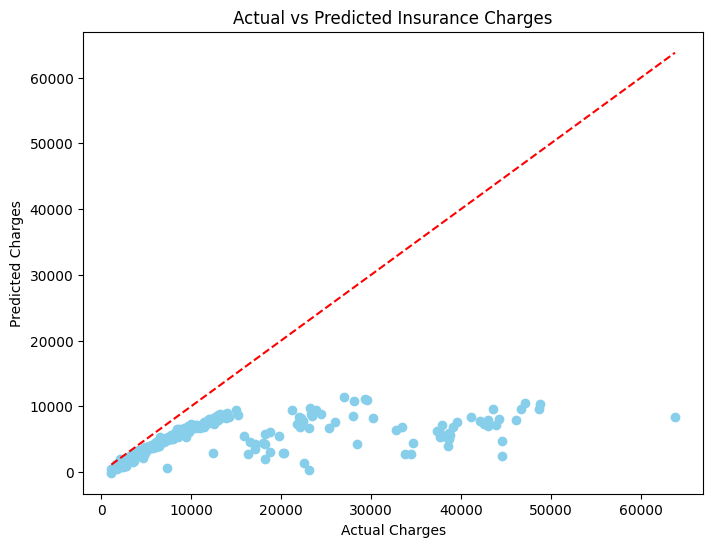

In [86]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred, c='skyblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()], 'r--') 
plt.show()

Text(0.5, 0, 'epochs')

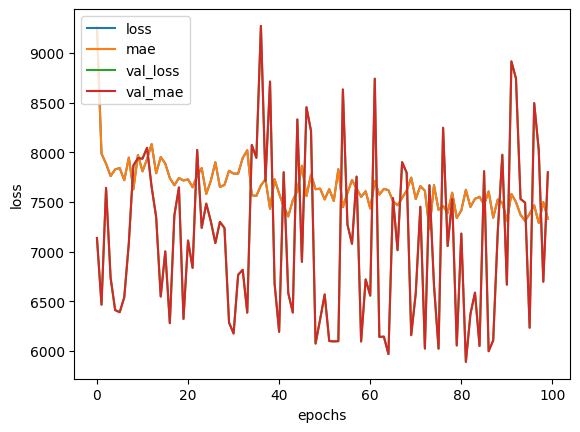

In [90]:
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [92]:
mae = mean_absolute_error(y_test_flat, y_pred)
mse = mean_squared_error(y_test_flat, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 8078.77
MSE: 188569776.00
RMSE: 13732.07
R2: -0.21


In [93]:
# Build a second neural network based on our requirements 

# 1.Create a model
tf.random.set_seed(42)
model1 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model1.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae'])

# 3. Fit the model
history1 = model1.fit(x_train, y_train, epochs=100)
history1

Epoch 1/100


C:\Users\ASUS\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 1s 6ms/step - loss: 13278.0674 - mae: 13278.0674
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 13083.1484 - mae: 13083.1484
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 12683.3154 - mae: 12683.3154
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 11926.0928 - mae: 11926.0928
Epoch 5/100
34/34 [==============================] - 0s 6ms/step - loss: 10724.2207 - mae: 10724.2207
Epoch 6/100
34/34 [==============================] - 0s 5ms/step - loss: 9277.9531 - mae: 9277.9531
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 8030.7720 - mae: 8030.7720
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 7507.6118 - mae: 7507.6118
Epoch 9/100
34/34 [==============================] - 0s 5ms/step - loss: 7430.3857 - mae: 7430.3857
Epoch 10/100
34/34 [==============================] - 0s 5ms/step - loss: 7410.7373 - mae: 7410.7373
E

In [94]:
y_pred = model1.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [95]:
# Evaluate model on test data
test_loss, test_mae = model.evaluate(x_test, y_test)
print("Test MAE:", test_mae)

9/9 [==============================] - 0s 4ms/step - loss: 8078.7705 - mae: 8078.7705
Test MAE: 8078.7705078125


In [96]:
y_pred = y_pred.flatten()
y_test_flat = y_test.values.flatten()

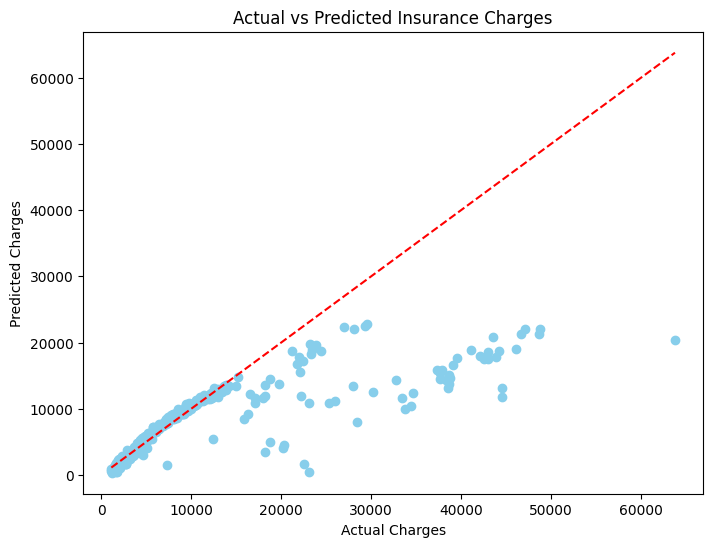

In [97]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred, c='skyblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()], 'r--')  # Ideal line
plt.show()

Text(0.5, 0, 'epochs')

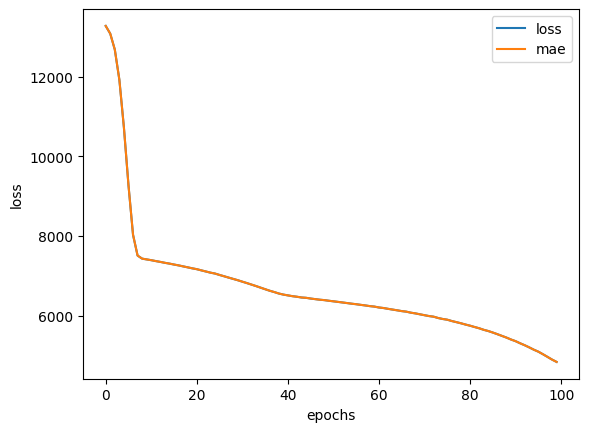

In [98]:
pd.DataFrame(history1.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [99]:
mae = mean_absolute_error(y_test_flat, y_pred)
mse = mean_squared_error(y_test_flat, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 4712.62
MSE: 93182304.00
RMSE: 9653.10
R2: 0.40


In [100]:
# Build a third neural network based on our requirements 

# 1.Create a model
tf.random.set_seed(42)
model2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(75),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model    
model2.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae'])

# 3. Fit the model
history2 = model2.fit(x_train, y_train, epochs=200)
history2

Epoch 1/200


C:\Users\ASUS\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 1s 6ms/step - loss: 12690.3467 - mae: 12690.3467
Epoch 2/200
34/34 [==============================] - 0s 5ms/step - loss: 8046.1943 - mae: 8046.1943
Epoch 3/200
34/34 [==============================] - 0s 6ms/step - loss: 7275.1426 - mae: 7275.1426
Epoch 4/200
34/34 [==============================] - 0s 6ms/step - loss: 7138.3257 - mae: 7138.3257
Epoch 5/200
34/34 [==============================] - 0s 5ms/step - loss: 7015.7827 - mae: 7015.7827
Epoch 6/200
34/34 [==============================] - 0s 5ms/step - loss: 6883.8252 - mae: 6883.8252
Epoch 7/200
34/34 [==============================] - 0s 6ms/step - loss: 6730.9702 - mae: 6730.9702
Epoch 8/200
34/34 [==============================] - 0s 6ms/step - loss: 6637.0703 - mae: 6637.0703
Epoch 9/200
34/34 [==============================] - 0s 6ms/step - loss: 6603.1616 - mae: 6603.1616
Epoch 10/200
34/34 [==============================] - 0s 5ms/step - loss: 6578.6943 - mae: 6578.6943
Epoch 11/

In [101]:
y_pred = model2.predict(x_test)

9/9 [==============================] - 0s 2ms/step


In [102]:
# Evaluate model on test data
test_loss, test_mae = model2.evaluate(x_test, y_test)
print("Test MAE:", test_mae)

9/9 [==============================] - 0s 4ms/step - loss: 3184.5842 - mae: 3184.5842
Test MAE: 3184.584228515625


In [103]:
y_pred = y_pred.flatten()
y_test_flat = y_test.values.flatten()

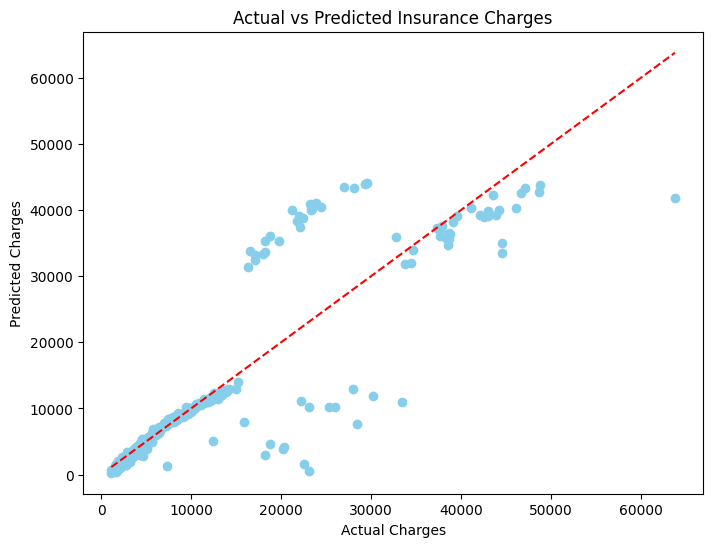

In [104]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred, c='skyblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()], 'r--')  
plt.show()

Text(0.5, 0, 'epochs')

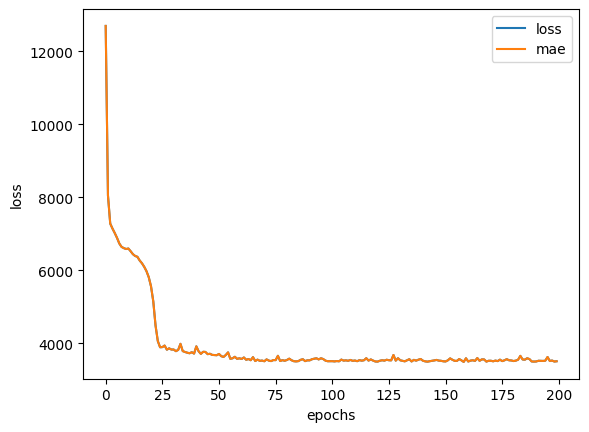

In [105]:
pd.DataFrame(history2.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [106]:
mae = mean_absolute_error(y_test_flat, y_pred)
mse = mean_squared_error(y_test_flat, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 3184.58
MSE: 42798364.00
RMSE: 6542.05
R2: 0.72


In [107]:
model2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_36 (Dense)            (None, 100)               1200      
                                                                 
 dense_37 (Dense)            (None, 75)                7575      
                                                                 
 dense_38 (Dense)            (None, 50)                3800      
                                                                 
 dense_39 (Dense)            (None, 25)                1275      
                                                                 
 dense_40 (Dense)            (None, 1)                 26        
                                                                 
Total params: 13,876
Trainable params: 13,876
Non-trainable params: 0
_________________________________________________________________


# Preprocessing the data (Normalization and standardization) 

In [108]:
# importing the dataset
df = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/refs/heads/master/insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [109]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [110]:
# Create a column transformer 
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown = "ignore"), ["sex", "smoker", "region"])
)

[]

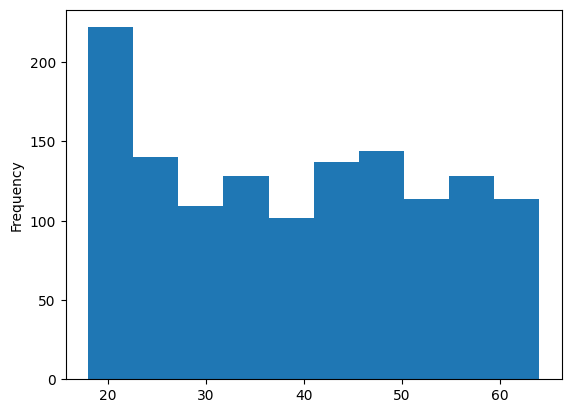

In [111]:
x['age'].plot(kind = 'hist')
plt.plot()

In [112]:
# create x and y

x = df.drop("charges", axis = 1)
y = df["charges"]

In [113]:
# Build our train and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [114]:
# Fit the column transformer to our training data
ct.fit(x_train)

,transformers,"[('minmaxscaler', ...), ('onehotencoder', ...)]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True
,force_int_remainder_cols,'deprecated'
,feature_range,"(0, ...)"
,copy,True
,clip,False


In [115]:
# Transform training and test data with normalization and OHE
x_train_normal = ct.transform(x_train)
x_test_normal = ct.transform(x_test)

In [116]:
x_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [117]:
# What does our data look like 
x_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [118]:
x_train.shape, x_train_normal.shape

((1070, 6), (1070, 11))

In [119]:
# Build a NN for this normalized data
tf.random.set_seed(42)

# 1. Create the model 
model4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(75),
    tf.keras.layers.Dense(50),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model 
model4.compile(loss = tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.Adam(lr = 0.001),
              metrics = ['mae'])

# 3. Fit the model
history4 = model4.fit(x_train_normal, y_train, epochs=100)
history4

Epoch 1/100


C:\Users\ASUS\anaconda3\envs\py310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:114: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


34/34 [==============================] - 1s 6ms/step - loss: 13326.1592 - mae: 13326.1592
Epoch 2/100
34/34 [==============================] - 0s 5ms/step - loss: 12810.1221 - mae: 12810.1221
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 9369.1855 - mae: 9369.1855
Epoch 4/100
34/34 [==============================] - 0s 5ms/step - loss: 7787.7539 - mae: 7787.7539
Epoch 5/100
34/34 [==============================] - 0s 4ms/step - loss: 7367.2520 - mae: 7367.2520
Epoch 6/100
34/34 [==============================] - 0s 4ms/step - loss: 6929.5938 - mae: 6929.5938
Epoch 7/100
34/34 [==============================] - 0s 5ms/step - loss: 6252.6543 - mae: 6252.6543
Epoch 8/100
34/34 [==============================] - 0s 5ms/step - loss: 5194.6001 - mae: 5194.6001
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 4032.3538 - mae: 4032.3538
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 3678.1421 - mae: 3678.1421
Epoch 1

In [120]:
y_pred = model4.predict(x_test_normal)

9/9 [==============================] - 0s 2ms/step


In [121]:
# Evaluate on test data
test_loss, test_mae = model4.evaluate(x_test_normal, y_test)

print("Test Loss:", test_loss)
print("Test MAE:", test_mae)

9/9 [==============================] - 0s 2ms/step - loss: 3177.4165 - mae: 3177.4165
Test Loss: 3177.41650390625
Test MAE: 3177.41650390625


In [122]:
y_pred = y_pred.flatten()
y_test_flat = y_test.values.flatten()

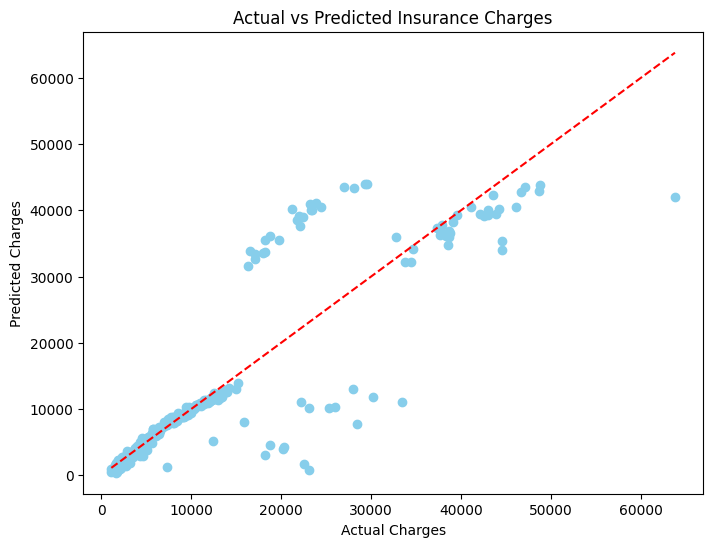

In [123]:
plt.figure(figsize=(8,6))
plt.scatter(y_test_flat, y_pred, c='skyblue')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual vs Predicted Insurance Charges')
plt.plot([y_test_flat.min(), y_test_flat.max()],
         [y_test_flat.min(), y_test_flat.max()], 'r--')  
plt.show()

Text(0.5, 0, 'epochs')

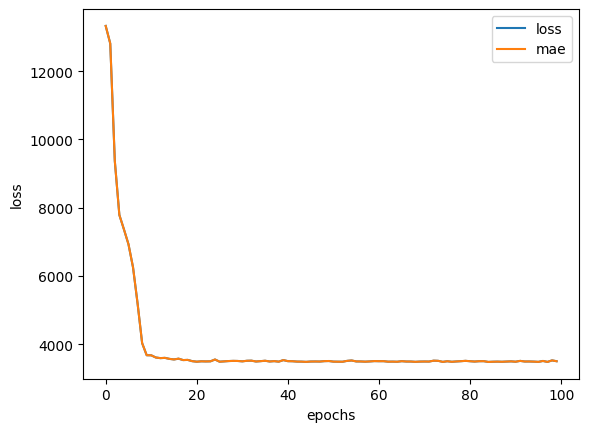

In [124]:
pd.DataFrame(history4.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')

In [125]:
mae = mean_absolute_error(y_test_flat, y_pred)
mse = mean_squared_error(y_test_flat, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test_flat, y_pred)

print(f"MAE: {mae:.2f}")
print(f"MSE: {mse:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R2: {r2:.2f}")

MAE: 3177.42
MSE: 42789919.07
RMSE: 6541.40
R2: 0.72


In [126]:
model4.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_41 (Dense)            (None, 100)               1200      
                                                                 
 dense_42 (Dense)            (None, 75)                7575      
                                                                 
 dense_43 (Dense)            (None, 50)                3800      
                                                                 
 dense_44 (Dense)            (None, 25)                1275      
                                                                 
 dense_45 (Dense)            (None, 1)                 26        
                                                                 
Total params: 13,876
Trainable params: 13,876
Non-trainable params: 0
_________________________________________________________________


# ANN Classification 

# Importing the libraries

In [19]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Load the dataset

In [20]:
data = load_breast_cancer()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target, columns=['target'])

# Learn the data and check for mull values

In [21]:
df = pd.concat([X, y], axis=1)

In [22]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [23]:
df.tail(1)

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
568,7.76,24.54,47.92,181.0,0.05263,0.04362,0.0,0.0,0.1587,0.05884,...,30.37,59.16,268.6,0.08996,0.06444,0.0,0.0,0.2871,0.07039,1


In [24]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [26]:
mv = df.isnull().sum()
mp = (mv/len(df))*100
mp = mp.round(2)
data = pd.DataFrame({'Missing value ' : mv, 'Missing Percentage ' : mp})
data

,Missing value,Missing Percentage
mean radius,0,0.0
mean texture,0,0.0
mean perimeter,0,0.0
mean area,0,0.0
mean smoothness,0,0.0
mean compactness,0,0.0
mean concavity,0,0.0
mean concave points,0,0.0
mean symmetry,0,0.0
mean fractal dimension,0,0.0


# Train- test split 

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling

In [28]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Build the model

In [29]:
# Build ANN model
model = keras.Sequential([
    keras.layers.Dense(30, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    keras.layers.Dense(15, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid') # sigmoid for binary classification
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model

In [30]:
history = model.fit(X_train_scaled, y_train, epochs=50, validation_split=0.1)

Epoch 1/50
13/13 [==============================] - 3s 21ms/step - loss: 0.6552 - accuracy: 0.6626 - val_loss: 0.5099 - val_accuracy: 0.8696
Epoch 2/50
13/13 [==============================] - 0s 6ms/step - loss: 0.4647 - accuracy: 0.8729 - val_loss: 0.3802 - val_accuracy: 0.8913
Epoch 3/50
13/13 [==============================] - 0s 8ms/step - loss: 0.3472 - accuracy: 0.9291 - val_loss: 0.2974 - val_accuracy: 0.9130
Epoch 4/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2669 - accuracy: 0.9389 - val_loss: 0.2412 - val_accuracy: 0.9348
Epoch 5/50
13/13 [==============================] - 0s 6ms/step - loss: 0.2120 - accuracy: 0.9584 - val_loss: 0.2031 - val_accuracy: 0.9348
Epoch 6/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1746 - accuracy: 0.9658 - val_loss: 0.1772 - val_accuracy: 0.9565
Epoch 7/50
13/13 [==============================] - 0s 7ms/step - loss: 0.1473 - accuracy: 0.9707 - val_loss: 0.1592 - val_accuracy: 0.9565
Epoch 8/50
13/13 [=

# Evaluate model

In [32]:
loss, accuracy = model.evaluate(X_test_scaled, y_test)
print(f"Test Accuracy: {accuracy*100:.2f}%")

4/4 [==============================] - 0s 3ms/step - loss: 0.0830 - accuracy: 0.9825
Test Accuracy: 98.25%


# Plot Loss Curve

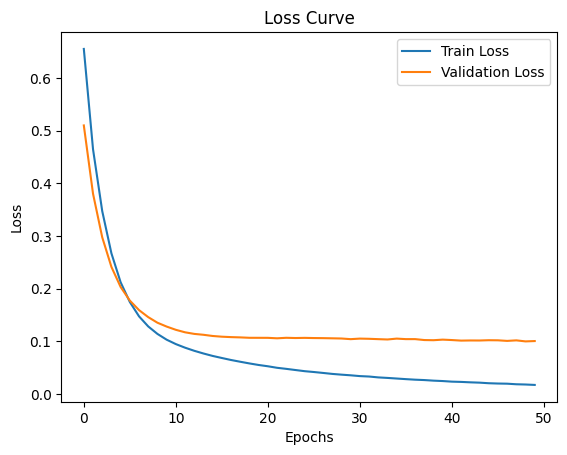

In [39]:
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.show()

# Predictions and Confusion Matrix

In [36]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype("int32")

4/4 [==============================] - 0s 3ms/step


# Confusion matrix plot

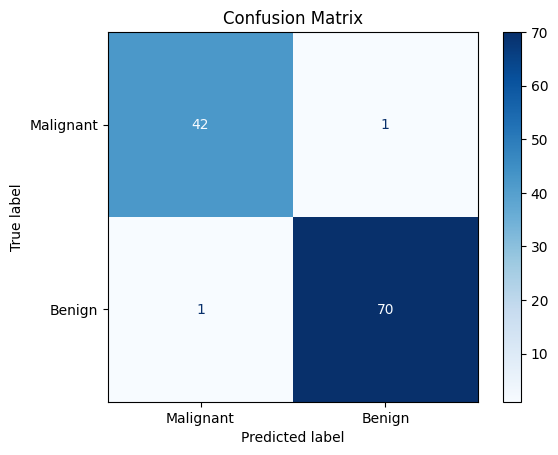

In [38]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Malignant','Benign'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()